In [49]:
# importing libraries
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
import IPython.display
import librosa
import librosa.display
import IPython.display as ipd
import python_speech_features as pyfilter
np.set_printoptions(threshold='nan')


In [69]:
fs = 192000
N = 2048
H = N/4
W = np.hanning(N)#'hann'

# tracks = ['drum','beat','bass','organ', 'epiano','piano','gui_ac','gui_st','clean','str','voc_f','voc_m','voc_h']
tracks = ['voc_h','piano','epiano','gui_ac','clean','gui_st']
track = [[],[],[],[],[],[]]
stft = [[],[],[],[],[],[]]
mx = [[],[],[],[],[],[]]
px = [[],[],[],[],[],[]]
sc = [[],[],[],[],[],[]]


m = len(tracks) # number of tracks

for t in range(0,m):
    track[t],fs = librosa.load('../samples/phrases1/'+tracks[t]+'.wav', sr = fs, mono = 'True')
    stft[t] = librosa.stft(y = track[t], n_fft = N, win_length=N, hop_length=H, window = W)   
    mx[t], px[t] = librosa.magphase(stft[t])
    mx[t] =  mx[t] / np.sum(W) #normlaising STFT output
    sc[t] = librosa.feature.spectral_centroid(y=track[t], sr=fs, S=None, n_fft=N, hop_length=H, freq=None)
track_sum = track[0]*0.0
for t in range(0,m):
    track_sum = np.add(track_sum, track[t])

sc_track_sum = librosa.feature.spectral_centroid(y=track_sum, sr=fs, S=None, n_fft=N, hop_length=H, freq=None)    
   
    
n_hops = 1+len(track[0])/H
pan_pos = np.random.randint(2, size=(m,1, n_hops))
pan_pos[0] = np.ones((1,n_hops))*1
pan_pos[1] = np.ones((1,n_hops))*0
pan_pos[2] = np.ones((1,n_hops))*0
pan_pos[3] = np.ones((1,n_hops))*1
pw = 0.059   
pf = [[],[],[],[],[],[]]
pp = [[],[],[],[],[],[]]
for t in range(0,m):
    if (m==1):
        pp[t]=0.5
    if (t+m % 2 != 0):
        pp[t] = (m-t-1.0)/(2.0*(m-1.0))
        if (pp[t]>0.5): pp[t]-=pw
        if (pp[t]<0.5): pp[t]+=pw
    elif (t+m % 2 == 0):
        pp[t] = 1.0 - ((m-t)/(2.0*(m-1.0)))
        if (pp[t]>0.5): pp[t]-=pw
        if (pp[t]<0.5): pp[t]+=pw
    print t, pp[t]        
    
# plt.figure(figsize=(16,6)) 
# plt.plot(np.transpose(pf[0]))
# plt.plot(np.transpose(pf[1]))
# plt.plot(np.transpose(pf[2]))
# plt.plot(np.transpose(pf[3]))
# plt.show()
print m


0 0.459
1 0.459
2 0.359
3 0.259
4 0.159
5 0.059
6


In [70]:
mxL = 1j*np.copy(mx)
mxR = 1j*np.copy(mx)

yl = [[],[],[],[],[],[]]
yr = [[],[],[],[],[],[]]
y = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]

for t in range(0,m):
    yl[t] = np.multiply ( np.cos(pp[t]*(np.pi/2.0)) , track[t] )
    yr[t] = np.multiply ( np.sin(pp[t]*(np.pi/2.0)) , track[t] )
    
    y[t] = [yl[t], yr[t]]
   

In [71]:
ipd.Audio(track_sum, rate=fs)

In [72]:
# y = np.add(np.add(np.add(y[0],y[1]),y[2]),y[3])
y_sum = np.multiply(y[0],0.0)
for t in range(0,m):
    y_sum = np.add(y_sum, y[t])

ipd.Audio(y_sum, rate=fs)

In [73]:
np.shape(y[0])

(2, 768001)

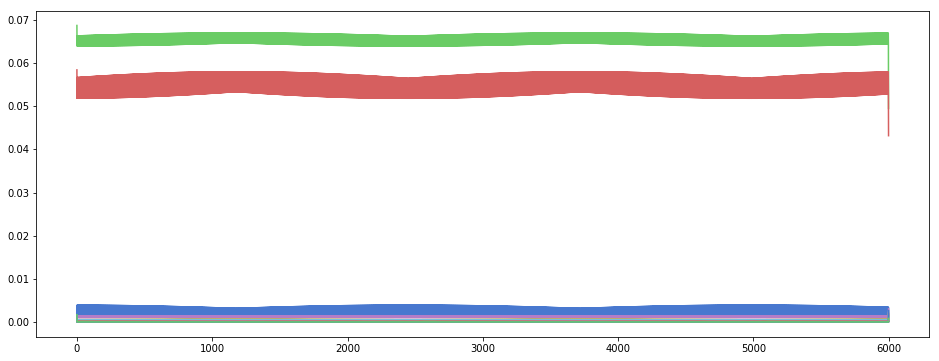

In [74]:
track,fs = librosa.load('../samples/sine_2000.wav', sr = fs, mono = 'True')
a, b = pyfilter.fbank(track, samplerate=16000, winlen=0.025, winstep=0.01, nfilt=26, nfft=512, lowfreq=0, highfreq=None, preemph=0.97)
plt.figure(figsize=(16,6)) 
plt.plot(a)
plt.show()
